In [322]:
import pycolmap 
from pathlib import Path 
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [323]:
print(pycolmap.__version__)

0.6.1


In [324]:
scene_folder = Path('../data/south-building')
images_folder = scene_folder / 'images'

database_path = scene_folder / 'database.db'

### Sparse Reconstruction

In [325]:
pycolmap.extract_features(database_path, images_folder, camera_model='SIMPLE_PINHOLE')
pycolmap.match_exhaustive(database_path)
maps = pycolmap.incremental_mapping(database_path, images_folder, scene_folder)
maps[0].write(scene_folder)

In [ ]:
maps

Convert to PLY format, suitable for 3D data. (Sparse point cloud)

In [326]:
reconstruction = pycolmap.Reconstruction(scene_folder)

In [328]:
reconstruction.export_PLY(scene_folder / 'sparse.ply')

### Examining Reconstruction

In [329]:
reconstruction = pycolmap.Reconstruction(scene_folder / '0')
print(reconstruction.summary())

Reconstruction:
	num_reg_images = 128
	num_cameras = 1
	num_points3D = 55723
	num_observations = 321950
	mean_track_length = 5.77769
	mean_observations_per_image = 2515.23
	mean_reprojection_error = 0.77626


In [330]:
help(reconstruction)

Help on Reconstruction in module pycolmap object:

class Reconstruction(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Reconstruction
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __copy__(...)
 |      __copy__(self: pycolmap.Reconstruction) -> pycolmap.Reconstruction
 |
 |  __deepcopy__(...)
 |      __deepcopy__(self: pycolmap.Reconstruction, arg0: dict) -> pycolmap.Reconstruction
 |
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |
 |      1. __init__(self: pycolmap.Reconstruction) -> None
 |
 |      2. __init__(self: pycolmap.Reconstruction, sfm_dir: str) -> None
 |
 |  __repr__(...)
 |      __repr__(self: pycolmap.Reconstruction) -> str
 |
 |  add_camera(...)
 |      add_camera(self: pycolmap.Reconstruction, arg0: pycolmap.Camera) -> None
 |
 |      Add new camera. There is only one camera per image, while multiple images
 |      might be taken by the same camera.
 |
 

In [331]:
for image_id, image in reconstruction.images.items():
    print(image_id, image)

1 Image(image_id=1, camera_id=1, name="P1180141.JPG", triangulated=1957/8172)
2 Image(image_id=2, camera_id=1, name="P1180142.JPG", triangulated=2092/8620)
3 Image(image_id=3, camera_id=1, name="P1180143.JPG", triangulated=1987/8982)
4 Image(image_id=4, camera_id=1, name="P1180144.JPG", triangulated=1254/9548)
5 Image(image_id=5, camera_id=1, name="P1180145.JPG", triangulated=573/6590)
6 Image(image_id=6, camera_id=1, name="P1180146.JPG", triangulated=681/7354)
7 Image(image_id=7, camera_id=1, name="P1180147.JPG", triangulated=1188/11882)
8 Image(image_id=8, camera_id=1, name="P1180148.JPG", triangulated=874/7044)
9 Image(image_id=9, camera_id=1, name="P1180149.JPG", triangulated=579/5770)
10 Image(image_id=10, camera_id=1, name="P1180150.JPG", triangulated=966/10874)
11 Image(image_id=11, camera_id=1, name="P1180151.JPG", triangulated=746/6926)
12 Image(image_id=12, camera_id=1, name="P1180152.JPG", triangulated=749/11264)
13 Image(image_id=13, camera_id=1, name="P1180153.JPG", triang

In [332]:
img = reconstruction.images[1]

help(img)

Help on Image in module pycolmap object:

class Image(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Image
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __copy__(...)
 |      __copy__(self: pycolmap.Image) -> pycolmap.Image
 |
 |  __deepcopy__(...)
 |      __deepcopy__(self: pycolmap.Image, arg0: dict) -> pycolmap.Image
 |
 |  __getstate__(...)
 |      __getstate__(self: pycolmap.Image) -> dict
 |
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |
 |      1. __init__(self: pycolmap.Image) -> None
 |
 |      2. __init__(self: pycolmap.Image, name: str = '', points2D: List[colmap::Point2D] = [], cam_from_world: pycolmap.Rigid3d = Rigid3d(quat_xyzw=[0, 0, 0, 1], t=[0, 0, 0]), camera_id: int = 4294967295, id: int = 4294967295) -> None
 |
 |      3. __init__(self: pycolmap.Image, name: str = '', keypoints: numpy.ndarray[numpy.float64[m, 2]] = array([], shape=(0, 2), dtype=float6

In [333]:
img.points2D

[Point2D(xy=[2362.33, 248.495], point3D_id=Invalid),
 Point2D(xy=[2460.76, 260.072], point3D_id=19740),
 Point2D(xy=[2376.69, 263.284], point3D_id=55059),
 Point2D(xy=[2417.9, 266.841], point3D_id=55060),
 Point2D(xy=[1784.64, 268.331], point3D_id=55063),
 Point2D(xy=[1784.64, 268.331], point3D_id=54268),
 Point2D(xy=[2367, 269.066], point3D_id=54659),
 Point2D(xy=[2301.58, 272.754], point3D_id=55061),
 Point2D(xy=[1826.8, 273.357], point3D_id=55993),
 Point2D(xy=[2880.77, 276.853], point3D_id=55058),
 Point2D(xy=[2309.42, 277.273], point3D_id=35104),
 Point2D(xy=[2309.42, 277.273], point3D_id=54662),
 Point2D(xy=[2358.86, 278.936], point3D_id=Invalid),
 Point2D(xy=[1817.95, 279.179], point3D_id=56459),
 Point2D(xy=[1817.95, 279.179], point3D_id=56458),
 Point2D(xy=[2439.09, 283.139], point3D_id=55278),
 Point2D(xy=[2883.39, 285.833], point3D_id=Invalid),
 Point2D(xy=[1825.92, 287.486], point3D_id=55978),
 Point2D(xy=[2291.1, 289.976], point3D_id=53606),
 Point2D(xy=[2363.92, 296.623],

In [334]:
for point3D_id, point3D in reconstruction.points3D.items():
    print(point3D)

Point3D(xyz=[0.701115, -1.24621, -0.0250445], color=[180, 176, 172], error=0.789371, track=Track(length=10))
Point3D(xyz=[1.00442, -1.30849, -0.0216563], color=[123, 121, 108], error=0.891513, track=Track(length=13))
Point3D(xyz=[0.143228, -1.92697, 0.533348], color=[143, 140, 143], error=0.616549, track=Track(length=5))
Point3D(xyz=[-2.05534, -0.405505, 1.67666], color=[103, 103, 106], error=0.269349, track=Track(length=3))
Point3D(xyz=[0.904906, -1.30766, -0.0172149], color=[126, 126, 116], error=0.700345, track=Track(length=10))
Point3D(xyz=[0.218628, -0.535287, -0.235786], color=[114, 84, 86], error=0.551904, track=Track(length=11))
Point3D(xyz=[-1.9254, 0.0179541, 1.52891], color=[126, 86, 79], error=0.501235, track=Track(length=8))
Point3D(xyz=[-0.947798, -0.753617, -0.269917], color=[129, 109, 108], error=0.890299, track=Track(length=21))
Point3D(xyz=[-1.46621, -0.868012, -0.205551], color=[182, 157, 139], error=0.754865, track=Track(length=16))
Point3D(xyz=[-2.28526, -0.439006,

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




Point3D(xyz=[-2.01687, -0.286724, -0.492259], color=[21, 29, 24], error=0.521631, track=Track(length=8))
Point3D(xyz=[-1.95423, -0.292639, -0.548449], color=[22, 25, 22], error=0.682392, track=Track(length=3))
Point3D(xyz=[-2.83423, -0.234975, -0.538809], color=[78, 115, 21], error=0.96802, track=Track(length=4))
Point3D(xyz=[-1.94894, -0.273534, -0.63567], color=[28, 49, 24], error=1.76619, track=Track(length=3))
Point3D(xyz=[-1.73823, -0.271234, -0.628081], color=[24, 25, 24], error=0.573231, track=Track(length=3))
Point3D(xyz=[-3.16807, -0.19985, -0.464312], color=[10, 16, 16], error=0.807764, track=Track(length=5))
Point3D(xyz=[-1.74893, -0.222567, -0.669301], color=[22, 22, 23], error=0.8119, track=Track(length=4))
Point3D(xyz=[-1.92609, -0.214106, -0.663367], color=[22, 28, 26], error=0.978157, track=Track(length=3))
Point3D(xyz=[-2.02592, -0.198736, -0.651832], color=[18, 22, 22], error=1.63433, track=Track(length=3))
Point3D(xyz=[-2.48443, -0.151454, -0.470576], color=[70, 107

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Point3D(xyz=[-1.75074, 0.980703, 4.51161], color=[39, 52, 44], error=1.04197, track=Track(length=3))
Point3D(xyz=[1.361, -0.243062, -0.528295], color=[85, 104, 76], error=0.49367, track=Track(length=3))
Point3D(xyz=[-1.94554, 1.11241, 4.39232], color=[45, 73, 33], error=1.09068, track=Track(length=3))
Point3D(xyz=[0.0605276, 0.86071, 2.79271], color=[105, 129, 97], error=0.724573, track=Track(length=3))
Point3D(xyz=[1.37863, -0.143533, -0.466471], color=[103, 135, 86], error=0.55157, track=Track(length=3))
Point3D(xyz=[1.45998, 0.0388691, 0.122526], color=[98, 129, 86], error=0.896281, track=Track(length=3))
Point3D(xyz=[1.48991, 0.00391499, -0.18239], color=[43, 60, 37], error=1.45494, track=Track(length=3))
Point3D(xyz=[1.46455, 0.116224, 0.149663], color=[39, 47, 32], error=0.411355, track=Track(length=4))
Point3D(xyz=[1.39299, -0.092618, -0.542409], color=[101, 127, 88], error=0.0707424, track=Track(length=2))
Point3D(xyz=[1.49352, 0.0804352, 0.0153953], color=[23, 36, 14], error=0

In [335]:
for camera_id, camera in reconstruction.cameras.items():
    print(camera_id, camera)

1 Camera(camera_id=1, model=SIMPLE_PINHOLE, width=3072, height=2304, params=[2596.644475, 1536.000000, 1152.000000] (f, cx, cy))


### Camera

In [336]:
help(img.cam_from_world)

Help on Rigid3d in module pycolmap object:

class Rigid3d(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Rigid3d
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __copy__(...)
 |      __copy__(self: pycolmap.Rigid3d) -> pycolmap.Rigid3d
 |
 |  __deepcopy__(...)
 |      __deepcopy__(self: pycolmap.Rigid3d, arg0: dict) -> pycolmap.Rigid3d
 |
 |  __getstate__(...)
 |      __getstate__(self: pycolmap.Rigid3d) -> dict
 |
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |
 |      1. __init__(self: pycolmap.Rigid3d) -> None
 |
 |      2. __init__(self: pycolmap.Rigid3d, arg0: pycolmap.Rotation3d, arg1: numpy.ndarray[numpy.float64[3, 1]]) -> None
 |
 |      3. __init__(self: pycolmap.Rigid3d, arg0: numpy.ndarray[numpy.float64[3, 4]]) -> None
 |
 |      4. __init__(self: pycolmap.Rigid3d, arg0: dict) -> None
 |
 |      5. __init__(self: pycolmap.Rigid3d, **kwargs) -> None
 |
 |  __mul_

#### Extrinsic Matrix 
These are parameters that do not depend on the camera, they include **rotation** and **translation** (which don't depend on camera's build). The rotation can be expressed by quarternion (that uses only 4x1 matrix instead of 3x3 matrix). The translation vector tells the camera's position relative to the origin. 

\begin{pmatrix}
r_{11} & r_{12} & r_{13} & t_{x} \\
r_{21} & r_{22} & r_{23} & t_{y} \\
r_{31} & r_{32} & r_{33} & t_{z} \\
0 & 0 & 0 & 1
\end{pmatrix}

It is used to translate world coordinate system to camera coordinate system. 

In [337]:
print(img.cam_from_world) # rotation quaternion & translation 

Rigid3d(quat_xyzw=[0.0227932, 0.480986, -0.142856, 0.864711], t=[-0.675337, 0.961804, 3.60128])


In [338]:
print(reconstruction.images[10].cam_from_world) # same camera but in different position

Rigid3d(quat_xyzw=[0.014252, 0.685329, -0.197098, 0.700909], t=[-0.540192, 0.948041, 3.50438])


In [339]:
print(img.cam_from_world.matrix()) # [R | t] matrix

[[ 0.49648903  0.26898449  0.82531569 -0.67533733]
 [-0.22513159  0.95814535 -0.17684248  0.96180415]
 [-0.83834027 -0.09800428  0.53626556  3.60128344]]


Essential matrix encapsulates the relative rotation and translation between two camera views.

In [340]:
print(img.cam_from_world.essential_matrix())

[[ 0.00117299 -0.93575377  0.30427251]
 [ 0.32253793  0.23824128  0.88019743]
 [-0.08592108 -0.23910667 -0.17801736]]


In [341]:
img.cam_from_world.rotation.quat # rotation quaternion

array([ 0.02279322,  0.48098616, -0.14285586,  0.86471093])

In [342]:
img.cam_from_world.translation # translation vector

array([-0.67533733,  0.96180415,  3.60128344])

#### Intrinsic matrix
This is needed to perform transformation between a point P in the 3D camera reference system to a point P' in the 2D image plane.

 \begin{pmatrix}
 fk & 0 & c_x & 0 \\
 0 & fk & c_y & 0 \\
 0 & 0 & 1 & 0 
 \end{pmatrix}
 
- f : focal length
- k : ratio $\frac{pixels}{cm}$ (digital images are expressed in pixels)
- $c_x$, $c_y$ : translation vector that describes offset between digital and camera coordinates

(this form of matrix is needed to make translations on 3D points)

In [343]:
reconstruction.cameras

{1: Camera(camera_id=1, model=SIMPLE_PINHOLE, width=3072, height=2304, params=[2596.644475, 1536.000000, 1152.000000] (f, cx, cy))}

In [344]:
point = reconstruction.points3D[2]
help(point.track)

Help on Track in module pycolmap object:

class Track(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      Track
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __copy__(...)
 |      __copy__(self: pycolmap.Track) -> pycolmap.Track
 |
 |  __deepcopy__(...)
 |      __deepcopy__(self: pycolmap.Track, arg0: dict) -> pycolmap.Track
 |
 |  __getstate__(...)
 |      __getstate__(self: pycolmap.Track) -> dict
 |
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |
 |      1. __init__(self: pycolmap.Track) -> None
 |
 |      2. __init__(self: pycolmap.Track, arg0: List[pycolmap.TrackElement]) -> None
 |
 |      3. __init__(self: pycolmap.Track, arg0: dict) -> None
 |
 |      4. __init__(self: pycolmap.Track, **kwargs) -> None
 |
 |  __repr__(...)
 |      __repr__(self: pycolmap.Track) -> str
 |
 |  __setstate__(...)
 |      __setstate__(self: pycolmap.Track, arg0: dict) -> None
 |
 |  add_el

In [345]:
print(point.track.todict())

{'elements': [TrackElement(image_id=72, point2D_idx=335), TrackElement(image_id=75, point2D_idx=273), TrackElement(image_id=74, point2D_idx=4929), TrackElement(image_id=101, point2D_idx=299), TrackElement(image_id=76, point2D_idx=182), TrackElement(image_id=77, point2D_idx=143), TrackElement(image_id=78, point2D_idx=135), TrackElement(image_id=104, point2D_idx=188), TrackElement(image_id=80, point2D_idx=521), TrackElement(image_id=81, point2D_idx=345)]}


In [346]:
camera = reconstruction.cameras[1]

### Translation to image plane

In [347]:
points = np.array([point.xyz for point in reconstruction.points3D.values()]) 
points

array([[ 7.01114570e-01, -1.24621441e+00, -2.50445239e-02],
       [ 1.00442412e+00, -1.30848535e+00, -2.16563322e-02],
       [ 1.43228372e-01, -1.92696609e+00,  5.33348158e-01],
       ...,
       [ 1.15584687e+00, -3.96815705e-01, -2.03058753e-01],
       [ 1.16553063e+00, -6.03014037e-02,  4.09934041e-02],
       [-1.96802496e-01,  1.44722781e-03,  1.36368120e+00]])

In [348]:
img = reconstruction.images[1]
print(img.cam_from_world.rotation.quat)
print(img.cam_from_world.translation)

[ 0.02279322  0.48098616 -0.14285586  0.86471093]
[-0.67533733  0.96180415  3.60128344]


In [349]:
rot = R.from_quat(img.cam_from_world.rotation.quat)

In [350]:
rot.as_matrix()

array([[ 0.49648903,  0.26898449,  0.82531569],
       [-0.22513159,  0.95814535, -0.17684248],
       [-0.83834027, -0.09800428,  0.53626556]])

In [351]:
img.cam_from_world.matrix() # same as above

array([[ 0.49648903,  0.26898449,  0.82531569, -0.67533733],
       [-0.22513159,  0.95814535, -0.17684248,  0.96180415],
       [-0.83834027, -0.09800428,  0.53626556,  3.60128344]])

In [352]:
extrinsic_matrix = np.concatenate((img.cam_from_world.matrix(), np.array([[0, 0, 0, 1]])))
extrinsic_matrix

array([[ 0.49648903,  0.26898449,  0.82531569, -0.67533733],
       [-0.22513159,  0.95814535, -0.17684248,  0.96180415],
       [-0.83834027, -0.09800428,  0.53626556,  3.60128344],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

Convert points (expressed in world coordinates) to homogenous coordinates

In [353]:
ps = np.concatenate((points, np.ones((len(points), 1), np.float32)), axis=1)
ps

array([[ 7.01114570e-01, -1.24621441e+00, -2.50445239e-02,
         1.00000000e+00],
       [ 1.00442412e+00, -1.30848535e+00, -2.16563322e-02,
         1.00000000e+00],
       [ 1.43228372e-01, -1.92696609e+00,  5.33348158e-01,
         1.00000000e+00],
       ...,
       [ 1.15584687e+00, -3.96815705e-01, -2.03058753e-01,
         1.00000000e+00],
       [ 1.16553063e+00, -6.03014037e-02,  4.09934041e-02,
         1.00000000e+00],
       [-1.96802496e-01,  1.44722781e-03,  1.36368120e+00,
         1.00000000e+00]])

In [354]:
ps @ extrinsic_matrix

array([[ 0.64965376, -1.00301112,  0.78559398, -0.76229547],
       [ 0.81142233, -0.98142222,  1.04874923, -1.01482234],
       [ 0.05780502, -1.86005779,  0.74499433,  0.97064643],
       ...,
       [ 0.83343338, -0.04940161,  0.91521901, -0.89351766],
       [ 0.5578825 ,  0.25171463,  0.99457792,  0.30250438],
       [-1.24126496, -0.18519677,  0.56861515,  6.04530254]])

In [355]:
print(reconstruction.cameras[1])

Camera(camera_id=1, model=SIMPLE_PINHOLE, width=3072, height=2304, params=[2596.644475, 1536.000000, 1152.000000] (f, cx, cy))


In [356]:
f, cx, cy = reconstruction.cameras[1].params
intrinsic_matrix = np.array([[f, 0, cx, 0], [0, f, cy, 0], [0, 0, 1, 0]])

In [357]:
intrinsic_matrix

array([[2.59664447e+03, 0.00000000e+00, 1.53600000e+03, 0.00000000e+00],
       [0.00000000e+00, 2.59664447e+03, 1.15200000e+03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [358]:
projected_to_camera_viewpoint = (ps @ extrinsic_matrix).T

In [359]:
projected_to_camera_viewpoint.shape

(4, 55723)

In [360]:
projected_to_image_viewpoint = (intrinsic_matrix @ projected_to_camera_viewpoint).T

In [361]:
projected_to_image_viewpoint[:, 0] /=  projected_to_image_viewpoint[:, 2]
projected_to_image_viewpoint[:, 1] /=  projected_to_image_viewpoint[:, 2]
points_2d = projected_to_image_viewpoint[:, :2]

In [362]:
points_2d[:, 0] = points_2d[:, 0] * f + cx
points_2d[:, 1] = points_2d[:, 1] * f + cy

In [363]:
points_2d.shape

(55723, 2)

In [364]:
points_2d[:5]

array([[  9565802.51102535,  -5616114.58566584],
       [  9206734.97943654,  -3317220.87359277],
       [  4513145.61609981, -13841944.8885955 ],
       [ 25689877.45272058,  13269168.64528262],
       [  9265877.22373986,  -4021363.92159807]])

### Packing into code
Here it uses `numpy` but ultimately it we will use `pytorch`

In [365]:
img = reconstruction.images[2]

In [366]:
def get_camera_from_image(image: pycolmap.Image):
    return image.cam_from_world

In [367]:
def get_extrinsic_params(camera: pycolmap.Rigid3d):
    return np.concatenate((camera.matrix(), np.array([[0, 0, 0, 1]])))

In [426]:
extrinsic_matrix = get_extrinsic_params(get_camera_from_image(img))
extrinsic_matrix

array([[ 0.49648903,  0.26898449,  0.82531569, -0.67533733],
       [-0.22513159,  0.95814535, -0.17684248,  0.96180415],
       [-0.83834027, -0.09800428,  0.53626556,  3.60128344],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [369]:
def get_intrinsic_params(reconstruction: pycolmap.Reconstruction):
    '''
    Assumes that there is only one camera, and it is a PINHOLE camera
    :param reconstruction: reconstruction object
    :return: 3x4 intrinsic matrix 
    '''
    f, cx, cy = reconstruction.cameras[1].params
    intrinsic_matrix = np.array([[f, 0, cx, 0], [0, f, cy, 0], [0, 0, 1, 0]])
    return intrinsic_matrix

In [370]:
intrinsic_matrix = get_intrinsic_params(reconstruction)
intrinsic_matrix

array([[2.59664447e+03, 0.00000000e+00, 1.53600000e+03, 0.00000000e+00],
       [0.00000000e+00, 2.59664447e+03, 1.15200000e+03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [371]:
reconstruction.points3D.values()

<pycolmap.ValuesView[colmap::Point3D] at 0x203945182f0>

In [372]:
def get_points_xyz(reconstruction: pycolmap.Reconstruction):
    return np.array([point.xyz for point in reconstruction.points3D.values()])

def points3D_to_np(points):
    return np.array([point.xyz for point in points]) 

def convert_to_homogenous(points):
    return np.concatenate((points, np.ones((len(points), 1), np.float32)), axis=1)

def convert_from_homogenous(points):
    x = points[:, 0] / points[:, 2]
    y = points[:, 1] / points[:, 2]
    return x, y

In [373]:
homogenous_points = convert_to_homogenous(get_points_xyz(reconstruction))
homogenous_points

array([[ 7.01114570e-01, -1.24621441e+00, -2.50445239e-02,
         1.00000000e+00],
       [ 1.00442412e+00, -1.30848535e+00, -2.16563322e-02,
         1.00000000e+00],
       [ 1.43228372e-01, -1.92696609e+00,  5.33348158e-01,
         1.00000000e+00],
       ...,
       [ 1.15584687e+00, -3.96815705e-01, -2.03058753e-01,
         1.00000000e+00],
       [ 1.16553063e+00, -6.03014037e-02,  4.09934041e-02,
         1.00000000e+00],
       [-1.96802496e-01,  1.44722781e-03,  1.36368120e+00,
         1.00000000e+00]])

In [374]:
projected_to_camera_viewpoint = (homogenous_points @ extrinsic_matrix).T
projected_to_camera_viewpoint.shape

(4, 55723)

In [375]:
projected_to_image_plane = (intrinsic_matrix @ projected_to_camera_viewpoint).T
projected_to_image_plane

array([[ 2.95218671e+03, -1.57901324e+03,  8.21924994e-01],
       [ 3.76924370e+03, -1.19416829e+03,  1.08625411e+00],
       [ 1.40561414e+03, -3.84979682e+03,  7.99060292e-01],
       ...,
       [ 3.55870143e+03,  1.03099784e+03,  9.26122873e-01],
       [ 2.93581422e+03,  1.88809413e+03,  9.93462121e-01],
       [-2.37709873e+03,  1.69964294e+02,  5.58908744e-01]])

In [376]:
x, y = convert_from_homogenous(projected_to_image_plane)

In [377]:
def projection_from_reconstruction(reconstruction: pycolmap.Reconstruction, img_id: int):
    extrinsic_matrix = get_extrinsic_params(get_camera_from_image(reconstruction.images[img_id]))
    intrinsic_matrix = get_intrinsic_params(reconstruction)
    homogenous_points = convert_to_homogenous(get_points_xyz(reconstruction))
    
    projected_to_camera_viewpoint = (homogenous_points @ extrinsic_matrix).T
    projected_to_image_plane = (intrinsic_matrix @ projected_to_camera_viewpoint).T
    
    x, y = convert_from_homogenous(projected_to_image_plane)
    c = np.array([p.color for p in reconstruction.points3D.values()]) / 255.0
    
    return x, y, c

def projection_from_points(points3D, img_id: int):
    extrinsic_matrix = get_extrinsic_params(get_camera_from_image(reconstruction.images[img_id]))
    intrinsic_matrix = get_intrinsic_params(reconstruction)
    homogenous_points = convert_to_homogenous(points3D_to_np(points3D))
    
    projected_to_camera_viewpoint = (homogenous_points @ extrinsic_matrix).T
    projected_to_image_plane = (intrinsic_matrix @ projected_to_camera_viewpoint).T
    
    x, y = convert_from_homogenous(projected_to_image_plane)
    c = np.array([p.color for p in points3D]) / 255.0
    
    return x, y, c

### Test

In [378]:
len(reconstruction.images)

128

In [379]:
img_id = 1
img = reconstruction.images[img_id]
img_name = img.name
x, y, c = projection_from_reconstruction(reconstruction, img_id)

In [380]:
x, y

(array([ 3683.31768329,  3545.03632245,  1737.47683212, ...,
         3900.60359628,  2992.51989673, -4132.37486485]),
 array([-2163.27904737, -1277.94655983, -5331.1483429 , ...,
         1011.83855794,  1809.17666107,   306.27831899]))

In [381]:
img_points = np.stack((x, y)).T
img_points[:3]

array([[ 3683.31768329, -2163.27904737],
       [ 3545.03632245, -1277.94655983],
       [ 1737.47683212, -5331.1483429 ]])

In [382]:
magnitudes = np.linalg.norm(img_points, axis=1)

In [383]:
magnitudes # distances from the (0, 0) point

array([4271.60454547, 3768.34578261, 5607.13548937, ..., 4029.70540892,
       3496.89798583, 4143.70950144])

In [384]:
points_ids = np.where(magnitudes < 4000)[0]
print(points_ids)
selected_points = img_points[points_ids]
print(selected_points.shape)
selected_colors = c[points_ids]
print(selected_colors.shape)

[    1     4    10 ... 55715 55716 55721]
(23849, 2)
(23849, 3)


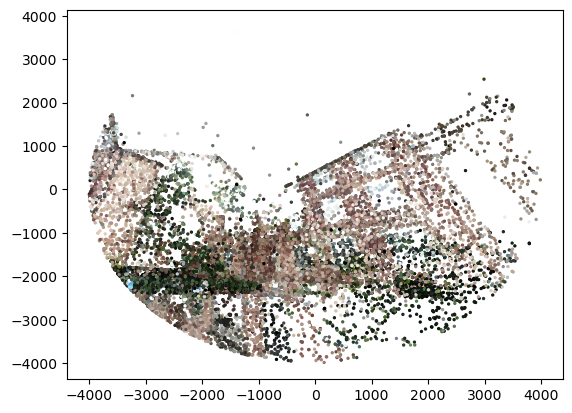

In [385]:
plt.scatter(-selected_points[:, 0], -selected_points[:, 1], s=2, c=selected_colors)

In [386]:
points_2d = np.array([p.xy for p in img.points2D])

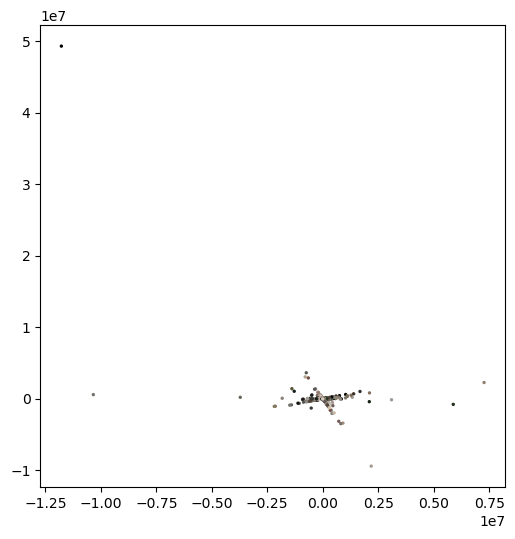

In [387]:
plt.figure(figsize=(6, 6))
plt.scatter(img_points[:, 0], img_points[:, 1], s=2, c=c)

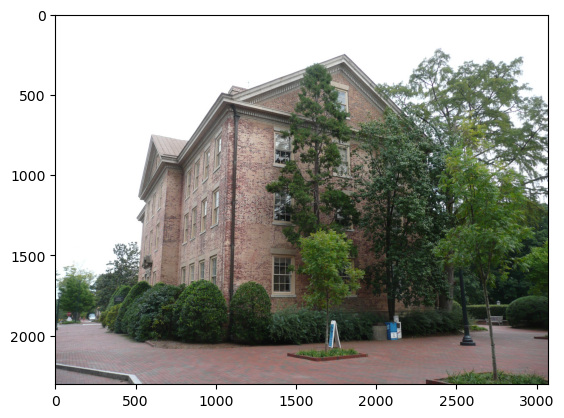

In [388]:
image = mpimg.imread(images_folder / img_name)
plt.imshow(image)

C:\Users\julia\AppData\Local\Temp\ipykernel_28540\226664309.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points_2d[:, 0], -points_2d[:, 1], s=2, cmap='viridis')


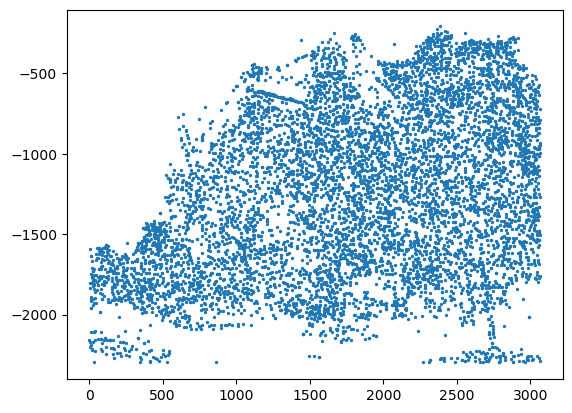

In [389]:
plt.scatter(points_2d[:, 0], -points_2d[:, 1], s=2, cmap='viridis')

In [390]:
len(img.points2D)

8172

In [411]:
filtered_points_2d = [p for p in img.points2D if p.point3D_id < 18446744073709551615]
point_3d_ids = [p.point3D_id for p in filtered_points_2d]

In [414]:
filtered_points_2d

[Point2D(xy=[2460.76, 260.072], point3D_id=19740),
 Point2D(xy=[2376.69, 263.284], point3D_id=55059),
 Point2D(xy=[2417.9, 266.841], point3D_id=55060),
 Point2D(xy=[1784.64, 268.331], point3D_id=55063),
 Point2D(xy=[1784.64, 268.331], point3D_id=54268),
 Point2D(xy=[2367, 269.066], point3D_id=54659),
 Point2D(xy=[2301.58, 272.754], point3D_id=55061),
 Point2D(xy=[1826.8, 273.357], point3D_id=55993),
 Point2D(xy=[2880.77, 276.853], point3D_id=55058),
 Point2D(xy=[2309.42, 277.273], point3D_id=35104),
 Point2D(xy=[2309.42, 277.273], point3D_id=54662),
 Point2D(xy=[1817.95, 279.179], point3D_id=56459),
 Point2D(xy=[1817.95, 279.179], point3D_id=56458),
 Point2D(xy=[2439.09, 283.139], point3D_id=55278),
 Point2D(xy=[1825.92, 287.486], point3D_id=55978),
 Point2D(xy=[2291.1, 289.976], point3D_id=53606),
 Point2D(xy=[2363.92, 296.623], point3D_id=55282),
 Point2D(xy=[2291.57, 298.764], point3D_id=55283),
 Point2D(xy=[2326.27, 300.698], point3D_id=55065),
 Point2D(xy=[2584.51, 300.184], point

In [415]:
len(point_3d_ids)

1957

In [416]:
filtered_points3D = [reconstruction.points3D[i] for i in point_3d_ids]
filtered_points3D

[Point3D(xyz=[1.77679, -1.40407, 1.53284], color=[252, 255, 251], error=1.31767, track=Track(length=13)),
 Point3D(xyz=[1.73481, -1.42404, 1.4385], color=[144, 156, 156], error=0.662182, track=Track(length=3)),
 Point3D(xyz=[1.7386, -1.41636, 1.50504], color=[99, 114, 106], error=0.324179, track=Track(length=3)),
 Point3D(xyz=[1.26134, -1.67415, 0.979293], color=[191, 193, 190], error=0.747754, track=Track(length=4)),
 Point3D(xyz=[1.2611, -1.67359, 0.97839], color=[195, 197, 192], error=0.905585, track=Track(length=11)),
 Point3D(xyz=[1.70332, -1.42978, 1.46132], color=[247, 255, 247], error=1.39942, track=Track(length=4)),
 Point3D(xyz=[1.65729, -1.45258, 1.40409], color=[249, 255, 253], error=0.732634, track=Track(length=5)),
 Point3D(xyz=[1.26372, -1.6671, 1.04354], color=[112, 110, 112], error=0.450292, track=Track(length=5)),
 Point3D(xyz=[2.09592, -1.20916, 1.78331], color=[238, 255, 253], error=0.144025, track=Track(length=3)),
 Point3D(xyz=[1.65301, -1.44992, 1.42163], color=[

In [417]:
x, y, c = projection_from_points(filtered_points3D, img_id)

In [418]:
img_points = np.stack((x, y)).T
magnitudes = np.linalg.norm(img_points, axis=1)
points_ids = np.where(magnitudes < 5000)[0]
selected_points = img_points[points_ids]
print(selected_points.shape)
selected_colors = c[points_ids]
print(selected_colors.shape)

(1572, 2)
(1572, 3)


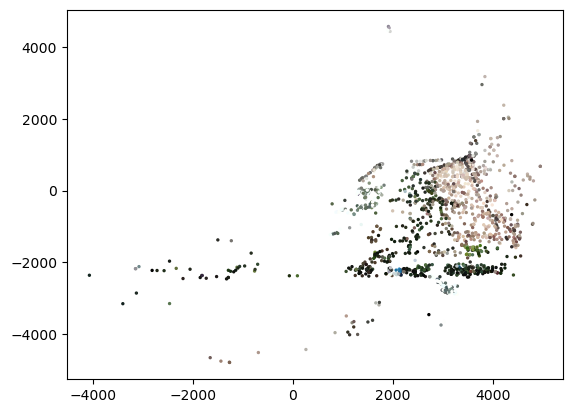

In [419]:
plt.scatter(selected_points[:, 0], -selected_points[:, 1], s=2, c=selected_colors)

### Checks

In [423]:
img

Image(image_id=1, camera_id=1, name="P1180141.JPG", triangulated=1957/8172)

In [421]:
p_2d = filtered_points_2d[0]
p_2d

Point2D(xy=[2460.76, 260.072], point3D_id=19740)

In [422]:
reconstruction.points3D[p_2d.point3D_id] 

Point3D(xyz=[1.77679, -1.40407, 1.53284], color=[252, 255, 251], error=1.31767, track=Track(length=13))

In [427]:
extrinsic_matrix = get_extrinsic_params(img.cam_from_world)

In [428]:
extrinsic_matrix

array([[ 0.49648903,  0.26898449,  0.82531569, -0.67533733],
       [-0.22513159,  0.95814535, -0.17684248,  0.96180415],
       [-0.83834027, -0.09800428,  0.53626556,  3.60128344],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [430]:
R.from_quat(img.cam_from_world.rotation.quat).as_matrix()

array([[ 0.49648903,  0.26898449,  0.82531569],
       [-0.22513159,  0.95814535, -0.17684248],
       [-0.83834027, -0.09800428,  0.53626556]])

In [425]:
projection_from_points([reconstruction.points3D[p_2d.point3D_id]], img_id)

(array([1447.1681627]),
 array([110.36281311]),
 array([[0.98823529, 1.        , 0.98431373]]))